# Data Visualization Example with Netflix's Stock

## Import Packages

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

## Load and Inspect Data

In [4]:
netflix_stocks = pd.read_csv('NFLX.csv')
print("Netflix:")
print(netflix_stocks.head())
print(netflix_stocks.info(), "\n")

dowjones_stocks = pd.read_csv('DJI.csv')
print("Dow Jones:")
print(dowjones_stocks.head())
print(dowjones_stocks.info())

Netflix:
         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12 non-null     object 
 1   Open       12 non-null     float64
 2   High       12 non-null     float64
 3   Low        12 non-null     float64
 4   Close      12 non-null     float64
 5   Adj Close  12 non-null     float64
 6   Volume     

The first two datasets have 7 columns and 12 rows consisting the first day of each month in 2017.

In [5]:
netflix_stocks_quarterly = pd.read_csv('NFLX_daily_by_quarter.csv')
print("Netflix Quarterly:")
print(netflix_stocks_quarterly.head())
print(netflix_stocks_quarterly.info())

Netflix Quarterly:
         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-03  124.959999  128.190002  124.309998  127.489998  127.489998   
1  2017-01-04  127.489998  130.169998  126.550003  129.410004  129.410004   
2  2017-01-05  129.220001  132.750000  128.899994  131.809998  131.809998   
3  2017-01-06  132.080002  133.880005  129.809998  131.070007  131.070007   
4  2017-01-09  131.479996  131.990005  129.889999  130.949997  130.949997   

     Volume Quarter  
0   9437900      Q1  
1   7843600      Q1  
2  10185500      Q1  
3  10657900      Q1  
4   5766900      Q1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5

This third dataset has an additional column indicating the quarter and constists of 251 total entries, over the course of the 2017 year.  The first two datasets are the first day in every month of 2017 the last one is by day for each quarter.

## Clean Data

In [8]:
#print("Netflix Columns:")
#print(netflix_stocks.columns, "\n")

## Rename Columns
netflix_stocks.rename(columns={"Adj Close":"Price"}, inplace = True)
dowjones_stocks.rename(columns={"Adj Close":"Price"}, inplace = True)
netflix_stocks_quarterly.rename(columns={"Adj Close":"Price"}, inplace = True)

## Check
print(netflix_stocks.head())
#print(dowjones_stocks.head())
#print(netflix_stocks_quarterly.head())

         Date        Open        High         Low       Close       Price  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  


## Visualize Netflix Quarterly Data with Violin Graph

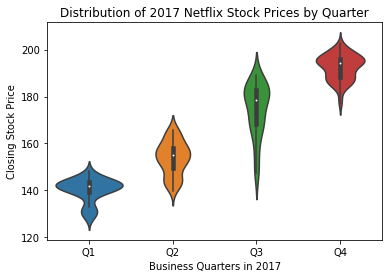

In [9]:
ax = sns.violinplot(netflix_stocks_quarterly.Quarter, netflix_stocks_quarterly.Price, data = netflix_stocks_quarterly)
ax.set_title("Distribution of 2017 Netflix Stock Prices by Quarter")
ax.set_xlabel("Business Quarters in 2017")
ax.set_ylabel("Closing Stock Price")

plt.show()

There is a general trend upwards as the year progresses. The third quarter has the most skewed distribution which means it had the most range throughout the quarter. Other than quarter three, the other quarters are bimodal with a smaller rise in the beginning of the quarter and a higher rise towards the end. The lowest price was around 120 and the highest around 200, with the price mostly staying between 140 to just under 200.

## Visual Actual vs. Predicted EPS

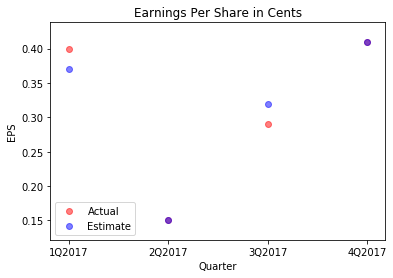

In [10]:
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]

plt.scatter(x_positions, earnings_actual, color = "red", alpha= .5)
plt.scatter(x_positions, earnings_estimate, color = "blue", alpha= .5)
plt.legend(["Actual", "Estimate"])
plt.xlabel("Quarter")
plt.ylabel("EPS")
plt.xticks(x_positions, chart_labels)
plt.title("Earnings Per Share in Cents")

plt.show()

In the first quarter, Actual EPS is higher than the estimate by about .04. For the second and fourth quarter, the estimate and actual are the same. And for the 3rd quarter the estimate is higher than the actual by about .02.

## Visualize Netflix Earnings and Revenue by Quarter

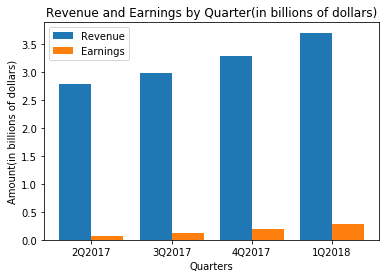

In [11]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# Revenue
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d =  4 # Number of sets of bars
w = .8 # Width of each bar
bars1_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars1_x, revenue_by_quarter)


# Earnings
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = .8 # Width of each bar
bars2_x = [t*element + w*n for element
             in range(d)]
plt.bar(bars2_x, earnings_by_quarter)


middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
labels = ["Revenue", "Earnings"]

plt.legend(labels)
plt.xticks(middle_x, quarter_labels)
plt.title("Revenue and Earnings by Quarter(in billions of dollars)")
plt.xlabel("Quarters")
plt.ylabel("Amount(in billions of dollars)")

plt.show()

Both revenue and earnings increase each quarter.  Earnings is only a small percent of revenue each quarter, from about 2% to 8%.

## Compare Netflix stock to Dow Jones

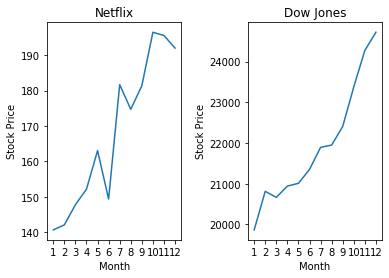

In [12]:
# Left plot Netflix
ax1 = plt.subplot(1, 2, 1)
ax1.plot(range(1,13), netflix_stocks['Price'])
ax1.set_xticks(range(1,13))
ax1.set_title("Netflix")
ax1.set_xlabel("Month")
ax1.set_ylabel("Stock Price")



# Right plot Dow Jones
ax2 = plt.subplot(1, 2, 2)
ax2.plot(range(1,13), dowjones_stocks['Price'])
ax2.set_title("Dow Jones")
ax2.set_xticks(range(1,13))
ax2.set_xlabel("Month")
ax2.set_ylabel("Stock Price")

plt.subplots_adjust(wspace=.5)
plt.show()
#plt.savefig("2017 Netflix and Dow Jones Stock Prices.png") #save figure if desired

Both Netflix and the Dow Jones have the same general trend upwards. As the Dow Jones is more of an overall picture of the market it has less dips than Netflix does throughout the year. The max stock price for Netflix in 2017 was around 200 while it's lowest was 140. It ended the year at around 190.